In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
#databasesource=https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateArchiveDMZ&df[id]=DF_DP_LIVE&df[ag]=OECD&df[vs]=&av=true&pd=%2C&dq=ARG%2BBRA%2BNMEC%2BWLD%2BG-20%2BOECDE%2BOEU%2BG20%2BG-7%2BG7M%2BEA19%2BEU27_2020%2BEA18%2BEU28%2BEA17%2BEU27%2BEU%2BEA%2BUSA%2BGBR%2BTUR%2BCHE%2BSWE%2BESP%2BSVN%2BSVK%2BPRT%2BPOL%2BNOR%2BNZL%2BNLD%2BMEX%2BLUX%2BLTU%2BLVA%2BKOR%2BJPN%2BITA%2BISR%2BIRL%2BISL%2BHUN%2BGRC%2BDEU%2BFRA%2BFIN%2BEST%2BDNK%2BCZE%2BCRI%2BCOL%2BCHL%2BCAN%2BBEL%2BAUT%2BAUS%2BOECD%2BOAVG.HEALTHEXP%2BSUICIDE%2BFAMPUBEXP%2BSOCEXP%2BVIOLWOMEN%2BINCOMEINEQ%2BPOVERTY%2BWKGPOP%2BPOP%2BINDPROD%2BTOUR_GDP%2BGDEXPRD%2BWAGELEVEL%2BWAGEGAP%2BAVWAGE%2BHUR%2BHRWKD%2BLF%2BEMP%2BCGEXP%2BGGRSV%2BGGCOST%2BGGWEALTH%2BGGDEBT%2BGGEXPDEST%2BGGEXP%2BGGREV%2BGGNLEND%2BTRUSTGOV%2BTAXWEDGE%2BTAXSS%2BTAXGOODSERV%2BTAXPAYROLL%2BTAXCORP%2BTAXPROPERTY%2BTAXREV%2BTAXINCOME%2BSTINT%2BLTINT%2BNUCLEARPLANT%2BRENEWABLE%2BELECTRICITY%2BOILIMPPRICE%2BOILPROD%2BPLI%2BHOUSECOST%2BCPI%2BHHWEALTH%2BGFCFSECTOR%2BGFCFASSET%2BGDPLTFORECAST%2BNOMGDPFORECAST%2BREALGDPFORECAST%2BUNEMPEDU%2BEMPEDU%2BEDUPRIVEXP%2BEDUPUBEXP%2BEDUEXPTRY%2BEDUEXP%2BGDP...A&to[TIME_PERIOD]=false&vw=tb

In [2]:
db1 = pd.read_csv('/home/mateus/Downloads/OECD,DF_DP_LIVE,+all.csv')
indicators_db1 = ['Central government spending',
                'General government spending',
                'General government spending by destination'
               ]

db1 = db1.loc[
    db1['Indicator'].isin(indicators_db1)
][['Indicator',
   'Frequency',
   'TIME_PERIOD',
   'Country',
   'LOCATION',
   'OBS_VALUE'
  ]].drop_duplicates()

db1['TIME_PERIOD'] = db1['TIME_PERIOD'].apply(int)

db1.rename(columns={'TIME_PERIOD':'Year',
                    'Country':'Country Name',
                    'Indicator':'Indicator Name',
                    'LOCATION':'Country Code',
                    'OBS_VALUE':'Value'
                   },inplace=True)
db1 = db1.loc[db1['Value']>0]

db1 = db1[['Indicator Name','Year','Country Name','Country Code','Value']]
#print(db1[['']])

#db1[['Indicator']].drop_duplicates().sort_values(by='Indicator')

In [3]:
db4 = pd.read_csv('/home/mateus/Downloads/human-development-index/human-development-index.csv')
db4.rename(columns={'Entity':'Country Name',
                    'Code':'Country Code',
                    'Human Development Index':'Value'
                   }, inplace=True)

db4['Indicator Name'] = 'HDI - Human Development Index'

In [4]:
# #database2
# db4 = pd.read_excel('/home/mateus/Downloads/API_NY.GNP.PCAP.CD_DS2_en_excel_v2_86192.xls')
# db4_last_updated = db4.loc[0,['World Development Indicators']][0]
# db4.columns = [int(x) if isinstance(x, float) else x for x in db4.loc[2, :]]
# db4 = db4.loc[3:]

# def despivotar_tabela(df):
#     # Lista de colunas de anos como strings
#     anos = [ano for ano in range(1960, 2025) if ano in df.columns]
    
#     # Colunas que permanecem fixas
#     id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

#     # Despivotar com melt
#     df_long = pd.melt(df, 
#                       id_vars=id_vars,
#                       value_vars=anos,
#                       var_name='Year', 
#                       value_name='Value')

#     # Converter o ano para inteiro
#     df_long['Year'] = df_long['Year'].astype(int)

#     # Remover valores NaN da coluna 'Value'
#     df_long = df_long.dropna(subset=['Value'])

#     return df_long

# db4 = despivotar_tabela(db4)

In [5]:
db1.head()

,Indicator Name,Year,Country Name,Country Code,Value
219472,General government spending by destination,1972,Korea,KOR,3.496028
219475,General government spending by destination,1972,Australia,AUS,7.173826
219476,General government spending,1972,Korea,KOR,4.320829
219481,General government spending,1972,Korea,KOR,1.148159
219508,General government spending,1972,Korea,KOR,0.215573


In [6]:
db4.head()

,Country Name,Country Code,Year,Value,Indicator Name
0,Afghanistan,AFG,1990,0.285,HDI - Human Development Index
1,Afghanistan,AFG,1991,0.291,HDI - Human Development Index
2,Afghanistan,AFG,1992,0.301,HDI - Human Development Index
3,Afghanistan,AFG,1993,0.311,HDI - Human Development Index
4,Afghanistan,AFG,1994,0.305,HDI - Human Development Index


In [7]:
db1_db4 = pd.concat([db1,db4])

In [8]:
db1_db4.head()

,Indicator Name,Year,Country Name,Country Code,Value
219472,General government spending by destination,1972,Korea,KOR,3.496028
219475,General government spending by destination,1972,Australia,AUS,7.173826
219476,General government spending,1972,Korea,KOR,4.320829
219481,General government spending,1972,Korea,KOR,1.148159
219508,General government spending,1972,Korea,KOR,0.215573


In [9]:
# Pivotando a tabela
pivoted = db1_db4.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value",
    aggfunc='first'  # em caso de duplicatas, pega o primeiro
)

# Resetando o índice se quiser transformar em colunas normais
pivoted = pivoted.reset_index()

display(pivoted)

Indicator Name,Country Name,Year,Central government spending,General government spending,General government spending by destination,HDI - Human Development Index
0,Afghanistan,1990,NaN,NaN,NaN,0.285
1,Afghanistan,1991,NaN,NaN,NaN,0.291
2,Afghanistan,1992,NaN,NaN,NaN,0.301
3,Afghanistan,1993,NaN,NaN,NaN,0.311
4,Afghanistan,1994,NaN,NaN,NaN,0.305
...,...,...,...,...,...,...
7086,Zimbabwe,2019,NaN,NaN,NaN,0.584
7087,Zimbabwe,2020,NaN,NaN,NaN,0.582
7088,Zimbabwe,2021,NaN,NaN,NaN,0.581
7089,Zimbabwe,2022,NaN,NaN,NaN,0.594


In [10]:
population = pd.read_csv('/home/mateus/Downloads/population/population.csv')
population.rename(columns={'Entity':'Country Name'
                          }, inplace=True)

In [11]:
# Lista das colunas de interesse
colunas_desejadas = [
    "Central government spending",
    "HDI - Human Development Index",
    "General government spending",
    "General government spending by destination"
]

# Selecionar apenas linhas sem NaN nessas colunas
pivoted_withou_nan = pivoted.dropna(subset=colunas_desejadas)

pivoted_withou_nan

Indicator Name,Country Name,Year,Central government spending,General government spending,General government spending by destination,HDI - Human Development Index
355,Australia,2007,0.15,35.598057,6.466101,0.919
356,Australia,2008,37.10,38.207494,6.477275,0.924
357,Australia,2009,32.02,15963.620000,6.642231,0.927
358,Australia,2010,14.75,1.844781,6.424836,0.929
359,Australia,2011,15.35,1.833958,6.839182,0.933
...,...,...,...,...,...,...
6743,United States,2015,32.79,0.511003,8.210157,0.928
6744,United States,2016,0.13,3.201740,8.085667,0.929
6745,United States,2017,1.37,7.618467,6.036241,0.931
6746,United States,2018,14.07,7.508574,7.960324,0.934


In [12]:
pivoted_withou_nan = pd.merge(pivoted_withou_nan,
         population,
         on=['Country Name','Year'],
         how='left')

pivoted_withou_nan['Central government spending per capita'] = pivoted_withou_nan['Central government spending']/pivoted_withou_nan['Population (historical)']

pivoted_withou_nan['General government spending per capita'] = pivoted_withou_nan['General government spending']/pivoted_withou_nan['Population (historical)']

pivoted_withou_nan.head()

,Country Name,Year,Central government spending,General government spending,General government spending by destination,HDI - Human Development Index,Code,Population (historical),Central government spending per capita,General government spending per capita
0,Australia,2007,0.15,35.598057,6.466101,0.919,AUS,20954497,7.158368e-09,1.698827e-06
1,Australia,2008,37.10,38.207494,6.477275,0.924,AUS,21370545,1.736034e-06,1.787858e-06
2,Australia,2009,32.02,15963.620000,6.642231,0.927,AUS,21782958,1.469956e-06,7.328490e-04
3,Australia,2010,14.75,1.844781,6.424836,0.929,AUS,22141527,6.661690e-07,8.331768e-08
4,Australia,2011,15.35,1.833958,6.839182,0.933,AUS,22479723,6.828376e-07,8.158278e-08


In [52]:
var1 = ['Central government spending per capita']
var2 = ['HDI - Human Development Index']

In [53]:
pivoted_withou_nan_selected_col = pivoted_withou_nan[['Country Name',
                    'Year',
                    ] + var1 + var2]

In [54]:
value_columns = var + var2


world_average = df[value_columns+['Year']].groupby('Year').mean()

world_average = world_average.reset_index()

world_average['Country Name'] = 'World Average'

world_average.head()

,Year,Central government spending per capita,HDI - Human Development Index,Country Name
0,2007,0.000003,0.890310,World Average
1,2008,0.000003,0.893138,World Average
2,2009,0.000003,0.894414,World Average
3,2010,0.000005,0.898310,World Average
4,2011,0.000002,0.901724,World Average


In [55]:
pivoted_withou_nan_selected_col.head()

,Country Name,Year,Central government spending per capita,HDI - Human Development Index
0,Australia,2007,7.158368e-09,0.919
1,Australia,2008,1.736034e-06,0.924
2,Australia,2009,1.469956e-06,0.927
3,Australia,2010,6.661690e-07,0.929
4,Australia,2011,6.828376e-07,0.933


In [56]:
pivoted_withou_nan_selected_col = pd.concat([pivoted_withou_nan_selected_col,world_average])

In [63]:
pivoted_withou_nan_selected_col['HDI/gov spending'] = pivoted_withou_nan_selected_col[var2[0]] / pivoted_withou_nan_selected_col[var1[0]]


In [64]:
pivoted_withou_nan_selected_col.head()

,Country Name,Year,Central government spending per capita,HDI - Human Development Index,HDI/gov spending
0,Australia,2007,7.158368e-09,0.919,1.283812e+08
1,Australia,2008,1.736034e-06,0.924,5.322475e+05
2,Australia,2009,1.469956e-06,0.927,6.306309e+05
3,Australia,2010,6.661690e-07,0.929,1.394541e+06
4,Australia,2011,6.828376e-07,0.933,1.366357e+06


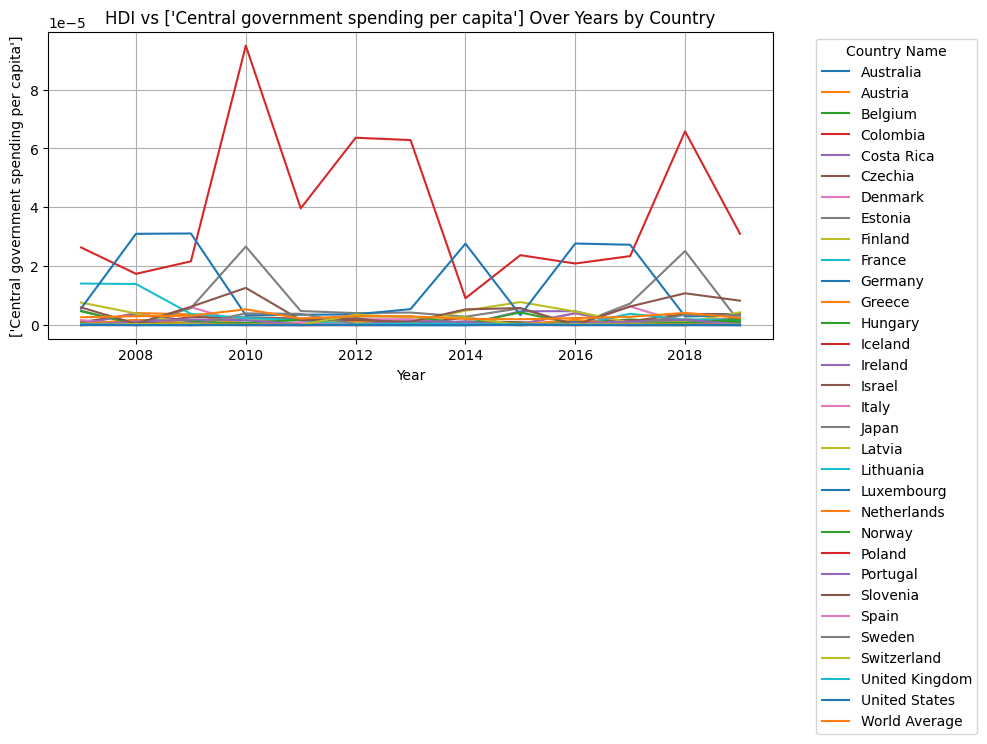

In [67]:
# Supondo que seu DataFrame se chame pivoted_withou_nan_selected_col
# e que ele tenha as colunas: 'Year', 'HDI/gov sending', 'Country Name'

plt.figure(figsize=(10, 6))

# Agrupa os dados por país e plota cada um
for country, group in pivoted_withou_nan_selected_col.groupby('Country Name'):
    plt.plot(group['Year'], group[var1], label=country)

plt.xlabel('Year')
plt.ylabel(var1)
plt.title(f'HDI vs {var1} Over Years by Country')
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.tight_layout()  # Para não cortar a legenda
plt.grid(True)
plt.show()

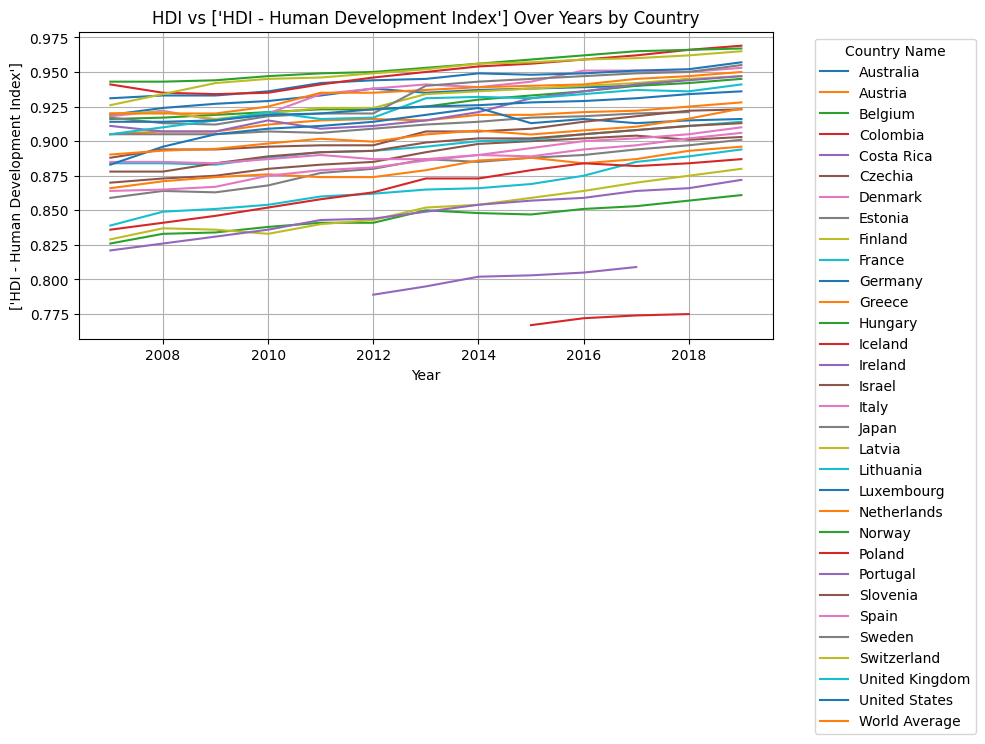

In [68]:
# Supondo que seu DataFrame se chame pivoted_withou_nan_selected_col
# e que ele tenha as colunas: 'Year', 'HDI/gov sending', 'Country Name'

plt.figure(figsize=(10, 6))

# Agrupa os dados por país e plota cada um
for country, group in pivoted_withou_nan_selected_col.groupby('Country Name'):
    plt.plot(group['Year'], group[var2], label=country)

plt.xlabel('Year')
plt.ylabel(var2)
plt.title(f'HDI vs {var2} Over Years by Country')
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.tight_layout()  # Para não cortar a legenda
plt.grid(True)
plt.show()

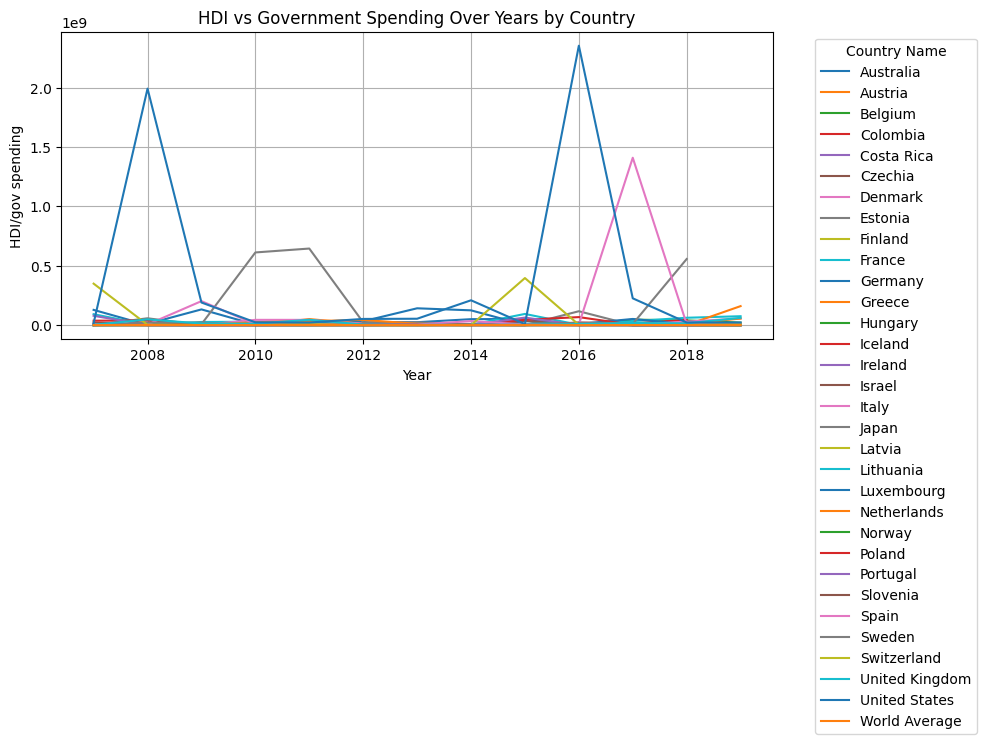

In [38]:
# Supondo que seu DataFrame se chame pivoted_withou_nan_selected_col
# e que ele tenha as colunas: 'Year', 'HDI/gov sending', 'Country Name'

plt.figure(figsize=(10, 6))

# Agrupa os dados por país e plota cada um
for country, group in pivoted_withou_nan_selected_col.groupby('Country Name'):
    plt.plot(group['Year'], group['HDI/gov spending'], label=country)

plt.xlabel('Year')
plt.ylabel('HDI/gov spending')
plt.title('HDI vs Government Spending Over Years by Country')
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.tight_layout()  # Para não cortar a legenda
plt.grid(True)
plt.show()

In [44]:
pivoted_withou_nan_selected_col[pivoted_withou_nan_selected_col['Year'].isin([
    2008,2016])].sort_values(by='HDI/gov spending',ascending=False)

,Country Name,Year,Central government spending per capita,HDI - Human Development Index,HDI/gov spending
381,United States,2016,3.949215e-10,0.929,2.352366e+09
373,United States,2008,4.590611e-10,0.914,1.991020e+09
83,Estonia,2016,7.599928e-09,0.890,1.171064e+08
290,Poland,2016,1.306738e-08,0.884,6.764934e+07
75,Estonia,2008,1.495851e-08,0.864,5.775978e+07
...,...,...,...,...,...
230,Lithuania,2008,1.396622e-05,0.849,6.078954e+04
153,Iceland,2008,1.741897e-05,0.935,5.367712e+04
161,Iceland,2016,2.092262e-05,0.959,4.583556e+04
251,Luxembourg,2016,2.771355e-05,0.916,3.305242e+04


In [80]:
pivoted_withou_nan[
                   (pivoted_withou_nan['Country Name']=='United States')
                  ]

,Country Name,Year,Central government spending,General government spending,General government spending by destination,HDI - Human Development Index,Code,Population (historical),Central government spending per capita,General government spending per capita
372,United States,2007,15.78,0.622687,8.962302,0.914,USA,301844176,5.227863e-08,2.062942e-09
373,United States,2008,0.14,4.301963,9.471192,0.914,USA,304970280,4.590611e-10,1.410617e-08
374,United States,2009,1.48,43.193796,6.753733,0.915,USA,308023398,4.804830e-09,1.402289e-07
375,United States,2010,12.11,8.975605,10.076158,0.919,USA,311062741,3.893105e-08,2.885465e-08
376,United States,2011,13.24,4.514062,9.706046,0.920,USA,314105041,4.215150e-08,1.437119e-08
...,...,...,...,...,...,...,...,...,...,...
380,United States,2015,32.79,0.511003,8.210157,0.928,USA,326126448,1.005438e-07,1.566887e-09
381,United States,2016,0.13,3.201740,8.085667,0.929,USA,329179362,3.949215e-10,9.726429e-09
382,United States,2017,1.37,7.618467,6.036241,0.931,USA,332204602,4.123965e-09,2.293306e-08
383,United States,2018,14.07,7.508574,7.960324,0.934,USA,335056439,4.199293e-08,2.240988e-08
